In [24]:
# https://www.kaggle.com/yamqwe/omicron-covid19-variant-daily-cases 

# num_sequences : number of sequences of the variant in the sequences examined
# num_sequences_total : total number of sequences examined
# perc_sequences : percentage of sequences of the variant

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
%matplotlib inline

# info
# memory_usage()
# columns
# nlargest()
# isna()
# duplicated()
# describe

df = pd.read_csv('covid-variants.csv') # change dataset to your csv file
df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [25]:
df['date'] = pd.to_datetime(df['date'])

def display_vc(df, col):
    return df[str(col)].value_counts()

display_vc(df, 'location') # change 'location' for value counts of other columns

Bangladesh        1080
Belgium           1080
United States     1080
United Kingdom    1080
France            1080
                  ... 
Montenegro         384
Monaco             360
Fiji               336
Benin              336
Brunei             240
Name: location, Length: 121, dtype: int64

In [26]:
clean_table = df[df['num_sequences'] > 0]
display_vc(clean_table, 'variant')

non_who           3213
others            3163
Delta             1776
Alpha             1663
Beta               901
B.1.177            758
Gamma              678
B.1.258            609
B.1.160            606
B.1.221            412
Eta                355
Mu                 300
Lambda             248
Epsilon            231
Iota               212
Kappa              200
B.1.1.519          196
Omicron            192
B.1.1.277          140
B.1.620            122
B.1.367            110
S:677H.Robin1       57
B.1.1.302           53
S:677P.Pelican      48
Name: variant, dtype: int64

In [27]:
def select_location(df, location):
    if location.title() not in df['location']:
        assert ValueError("Location not in dataframe.")
    df1 = df[df['location'] == location.title()]
    return df1

spec = select_location(df, 'united states') # change location here
spec

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
96768,United States,2020-05-11,Alpha,0,0.0,5804
96769,United States,2020-05-11,B.1.1.277,0,0.0,5804
96770,United States,2020-05-11,B.1.1.302,0,0.0,5804
96771,United States,2020-05-11,B.1.1.519,0,0.0,5804
96772,United States,2020-05-11,B.1.160,0,0.0,5804
...,...,...,...,...,...,...
97843,United States,2022-01-05,Omicron,28,80.0,35
97844,United States,2022-01-05,S:677H.Robin1,0,0.0,35
97845,United States,2022-01-05,S:677P.Pelican,0,0.0,35
97846,United States,2022-01-05,others,0,0.0,35


In [28]:
clean_spec = select_location(clean_table, 'united states') # change
clean_spec

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
96790,United States,2020-05-11,others,5804,100.00,5804
96791,United States,2020-05-11,non_who,5804,100.00,5804
96814,United States,2020-05-25,others,4736,100.00,4736
96815,United States,2020-05-25,non_who,4736,100.00,4736
96838,United States,2020-06-08,others,4035,100.00,4035
...,...,...,...,...,...,...
97819,United States,2021-12-27,Omicron,24681,50.13,49235
97822,United States,2021-12-27,others,154,0.32,49235
97823,United States,2021-12-27,non_who,155,0.32,49235
97835,United States,2022-01-05,Delta,7,20.00,35


In [55]:
var_set = clean_table[clean_table['variant'] == 'Omicron'] # Change omicron to variant
var_set

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
1699,Argentina,2021-12-13,Omicron,13,14.94,87
1723,Argentina,2021-12-27,Omicron,80,85.11,94
3331,Australia,2021-11-29,Omicron,8,0.40,1992
3355,Australia,2021-12-13,Omicron,366,13.07,2800
3379,Australia,2021-12-27,Omicron,1319,76.42,1726
...,...,...,...,...,...,...
97819,United States,2021-12-27,Omicron,24681,50.13,49235
97843,United States,2022-01-05,Omicron,28,80.00,35
98923,Vietnam,2021-12-27,Omicron,1,2.00,50
99715,Zambia,2021-12-13,Omicron,39,100.00,39


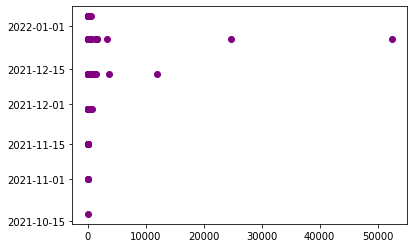

In [56]:
# Graphing variant

plt.scatter(var_set.num_sequences, var_set.date, color='purple')
plt.show()

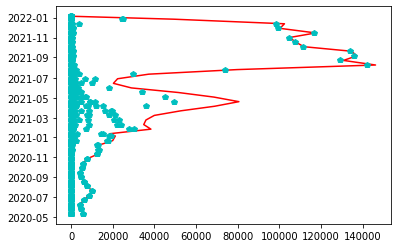

In [40]:
# Graphing total sequences and number of sequences

plt.plot(spec.num_sequences_total, spec.date, 'r') # change x and y to desired columns
plt.plot(spec.num_sequences, spec.date, 'cp')
plt.show()

#### Convert information into text

In [30]:
%%capture cap --no-stderr
print(df.info())

In [31]:
# Converts info into text file
with open('info.txt', 'w') as f:
    f.write(cap.stdout)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   location             100416 non-null  object        
 1   date                 100416 non-null  datetime64[ns]
 2   variant              100416 non-null  object        
 3   num_sequences        100416 non-null  int64         
 4   perc_sequences       100416 non-null  float64       
 5   num_sequences_total  100416 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [32]:
if 'null' in open('info.txt').read():
    df = df.dropna(axis=1, how='all')